In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
df = pd.read_csv(
    "DailyDelhiClimateTrain.csv",
    parse_dates=["date"]
)

df = df.sort_values("date")
df = df.set_index("date")

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


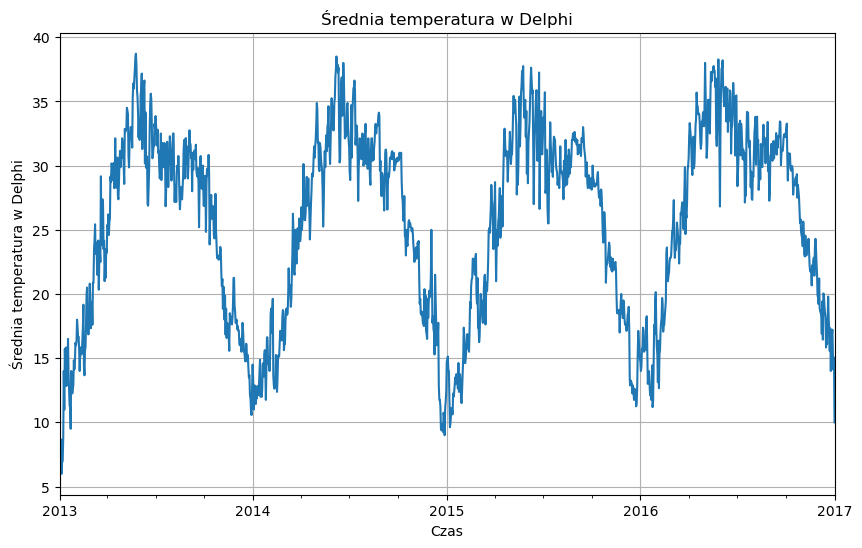

In [26]:
plt.figure(figsize=(10, 6))
df['meantemp'].plot(title="Średnia temperatura w Delphi", xlabel="Czas", ylabel="Średnia temperatura w Delphi")
plt.grid()
plt.show()

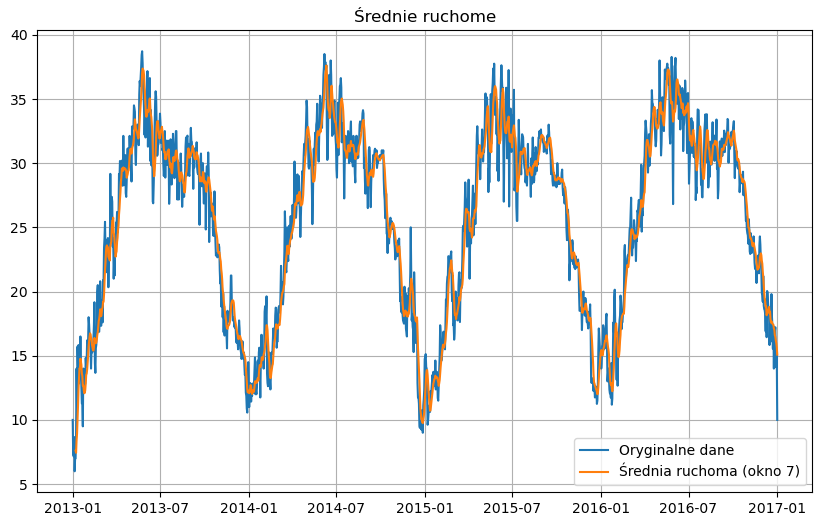

In [30]:
#Obliczanie średnich ruchomych

df['MA_7'] = df['meantemp'].rolling(window=7).mean()
df['MA_30'] = df['meantemp'].rolling(window=30).mean()

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(df['meantemp'], label="Oryginalne dane")
plt.plot(df['MA_7'], label="Średnia ruchoma (okno 7)")
#plt.plot(df['MA_30'], label="Średnia ruchoma (okno 30)")
plt.title("Średnie ruchome")
plt.legend()
plt.grid()
plt.show()

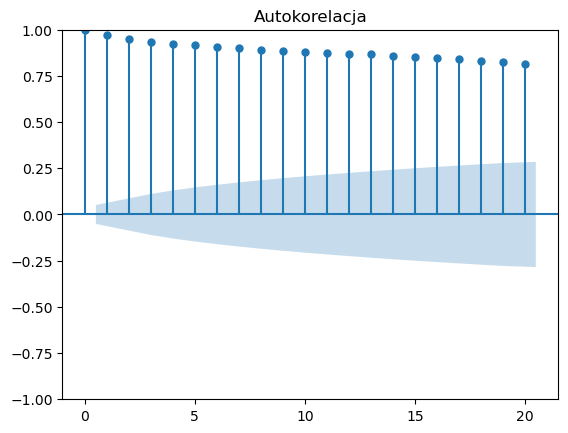

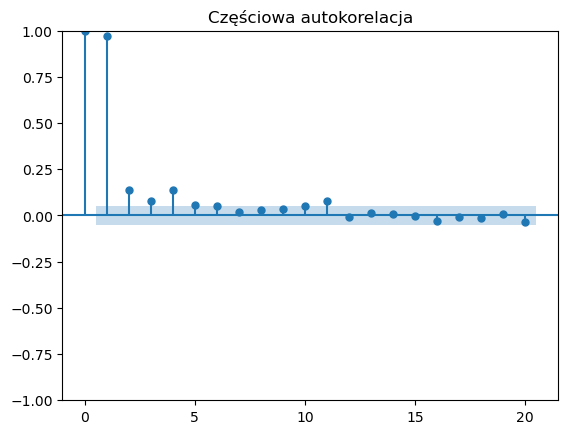

In [28]:
# ACF i PACF
plot_acf(df['meantemp'], lags=20, title="Autokorelacja")
plot_pacf(df['meantemp'], lags=20, title="Częściowa autokorelacja", method='ywm')
plt.show()

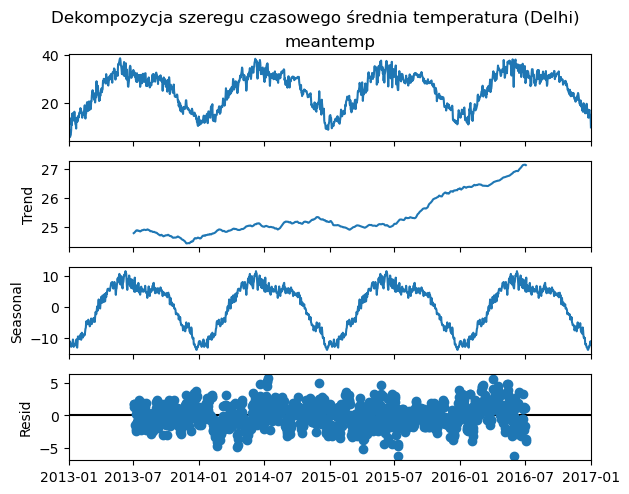

In [29]:
ts = df["meantemp"]

decomposition = seasonal_decompose(
    ts,
    model="additive",
    period=365
)

decomposition.plot()
plt.suptitle("Dekompozycja szeregu czasowego średnia temperatura (Delhi)", y=1.02)
plt.show()
